# **Brownian Motion for Financial Math**
In this project, we will investigate the stochastic process that is the building block of financial mathematics. We will consider a symmetric random walk, scaled random walk, and Brownian motion.

The essential properties of Brownian motion are that it is a martingale (Markov process) and accumulates quadratic variation at one per unit of time.

Note: Quadratic Variation is what makes Stochastic Calculus different from Ordinary Calculus.

In [1]:
import math
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
#parameters
M = 10 #number of simulations
t = 10 #Time

In [4]:
random_walk = [-1,1]
steps = np.random.choice(random_walk, size=(M,t)).T
origin = np.zeros((1,M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

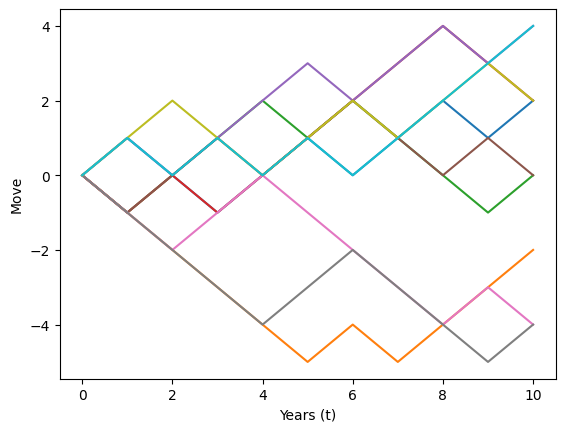

In [5]:
plt.plot(rw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

In [6]:
# Create Quadratic variation and Variance functions
quadratic_variation = lambda x: round(np.square(x[:-1]-x[1:]).sum(),3)
variance = lambda x: round(np.var(x,axis=0),3)

In [7]:
[quadratic_variation(path) for path in rw_paths.T[:4]]

[10.0, 10.0, 10.0, 10.0]

In [8]:
# Change the number of simulation to 10,000,000 to observe variance convergence on Time
[variance(path) for path in rw_paths[1:11]]

[0.96, 1.44, 2.44, 3.84, 5.0, 4.36, 6.6, 9.16, 8.16, 7.84]

# **Scaled Symmetric Random Walk**
To approximate a Brownian Motion, we can speed up time and scale down the step size.




In [9]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 10 #step size


In [10]:
random_walk = [-1, 1]
steps = (1/np.sqrt(n)) * np.random.choice(random_walk, size=(M,t*n)).T
origin = np.zeros((1,M))
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

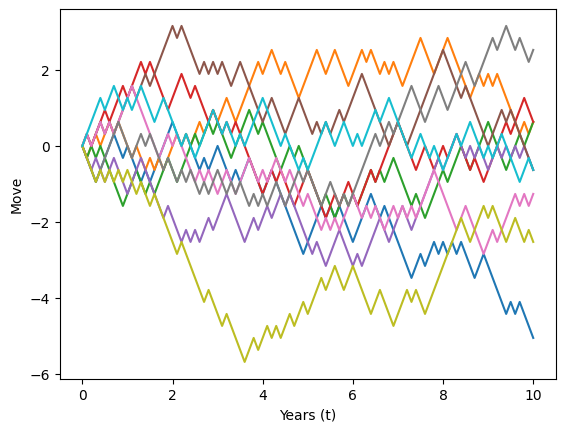

In [11]:
time = np.linspace(0,t,t*n+1)
tt = np.full(shape=(M, t*n+1), fill_value=time)
tt = tt.T
# print(np.size(tt),np.size(srw_paths))
plt.plot(tt,srw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()


In [12]:
# Change the number of simulations to 100,000 to observe variance convergence on Time
[variance(path) for path in srw_paths[1:11]]

[0.096, 0.164, 0.404, 0.436, 0.42, 0.404, 0.544, 0.656, 0.964, 0.964]

In [13]:
[quadratic_variation(path) for path in srw_paths.T[:4]]

[10.0, 10.0, 10.0, 10.0]

# **Limit of Binomial Distribution**
As n increases, the binomial distribution converges to the normal distribution with variance t.

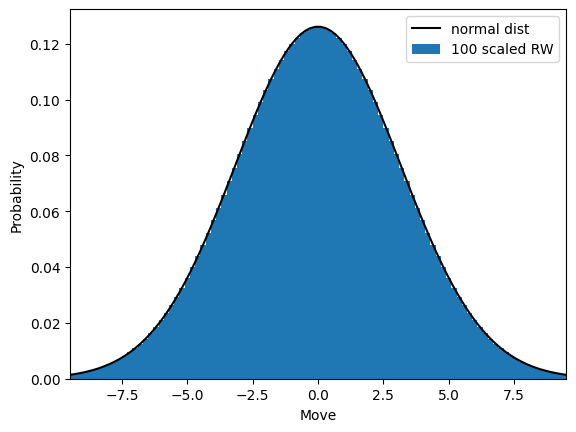

In [14]:
# Change the parameter n to see the impact of increasing the discretization
# of the random walk and how it converges on the normal distribution
n = 100
t = 10

# Combinations
def nCr(n,k):
    f = math.factorial
    return f(n) / (f(k) * f(n-k))

perms = [nCr(n*t,k)*(0.5)**(n*t) for k in range(int(n*t)+1)]

W_nt = lambda n,t: 1/np.sqrt(n) * np.arange(-n*t,n*t+1,2)

outcomes = W_nt(n,t)
plt.bar(outcomes,[perm/(outcomes[1]-outcomes[0]) for perm in perms],outcomes[1]-outcomes[0],
        label='{0} scaled RW'.format(n))

x = np.linspace(-3*np.sqrt(t), 3*np.sqrt(t), 100)
plt.plot(x, stats.norm.pdf(x, 0, np.sqrt(t)), 'k-',label='normal dist')

plt.xlim(-3*np.sqrt(t),3*np.sqrt(t))
plt.ylabel("Probability")
plt.xlabel("Move")
plt.legend()
plt.show()

# **Brownian Motion**

In [15]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 100 # steps we want to see
dt = t/n # time step


In [16]:
steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
origin = np.zeros((1,M))
bm_paths = np.concatenate([origin, steps]).cumsum(axis=0)

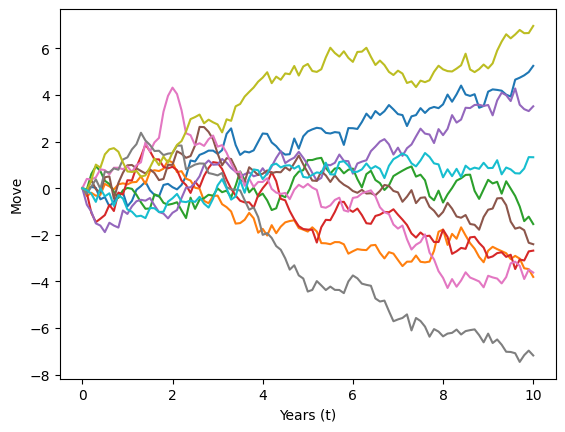

In [17]:
time = np.linspace(0,t,n+1)
tt = np.full(shape=(M, n+1), fill_value=time)
tt = tt.T

plt.plot(tt,bm_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()


In [18]:
# change time steps to 1,000,000 to observe same quadratic variation along paths
[quadratic_variation(path) for path in bm_paths.T[:4]]


[9.314, 7.59, 11.388, 11.214]

In [19]:
# change simulations to 100,000 to observe convergence of variance to Time at a particular time step
[variance(path) for path in bm_paths[1:11]]


[0.068, 0.293, 0.699, 0.639, 0.872, 0.722, 0.899, 0.707, 0.467, 0.661]